In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
# Combine the data into a single dataset
city_ride = pd.merge(ride_df, city_df, on = ["city", "city"], how="left")
# Display the data table for preview
city_ride

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


## Bubble Plot of Ride Sharing Data

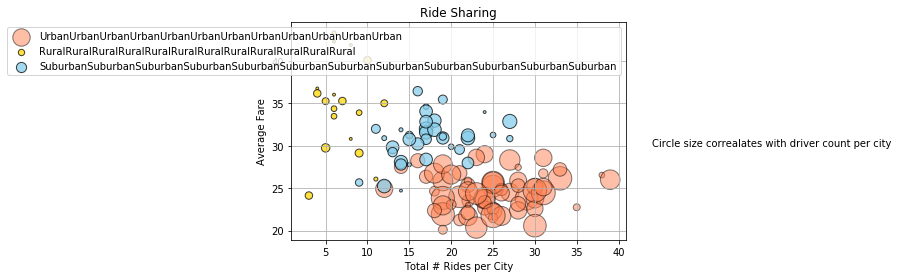

<Figure size 432x288 with 0 Axes>

In [25]:
# Obtain the x and y coordinates for each of the three city types
group_df = city_ride.groupby("city")
avg_fare = group_df["fare"].mean()
avg_fare
total_rides = group_df["ride_id"].count()
total_rides
total_drivers = group_df["driver_count"].max()
total_drivers
city_type = city_ride.groupby(["type", "city"]).count()
city_type
# Build the scatter plots for each city types
# Obtain the x and y coordinates for each of the three city types
urban_df = city_ride[city_ride["type"] == "Urban"].groupby([city_ride["city"]])
rural_df = city_ride[city_ride["type"] == "Rural"].groupby([city_ride["city"]])
suburban_df = city_ride[city_ride["type"] == "Suburban"].groupby([city_ride["city"]])
# Build the scatter plots for each city types
#Urban Average Fare, Total Number of rides, total # of drivers 
urban_avg_fare = urban_df["fare"].mean()
urban_total_rides = urban_df["ride_id"].nunique()
urban_drivers = urban_df["driver_count"].max()

#Rural Average Fare, Total Number of rides, total # of drivers 

rural_avg_fare = rural_df["fare"].mean()
rural_total_rides = rural_df["ride_id"].nunique()
rural_drivers = rural_df["driver_count"].max()

#Suburban  Average Fare, Total Number of rides, total # of drivers 

suburban_avg_fare = suburban_df["fare"].mean()
suburban_total_rides = suburban_df["ride_id"].nunique()
suburban_drivers = suburban_df["driver_count"].max()

# Incorporate the other graph properties
urban = plt.scatter(urban_total_rides, urban_avg_fare, label = "Urban" * 12, s = urban_drivers * 8, color = ["coral"], 
           edgecolor = "black", alpha = .50, marker = "o")
rural = plt.scatter(rural_total_rides, rural_avg_fare, label = "Rural" * 12, s = rural_drivers * 8, color = ["gold"], 
           edgecolor = "black", alpha = .75, marker = "o")
suburban = plt.scatter(suburban_total_rides, suburban_avg_fare, label = "Suburban" * 12, s = suburban_drivers * 8, color = ["skyblue"], 
           edgecolor = "black", alpha = .75, marker = "o")
#plt.legend(handles=[urban, rural, suburban], loc="best")

plt.grid()
plt.xlabel("Total # Rides per City")
plt.ylabel("Average Fare")
plt.title("Ride Sharing")
#plt.legend(title = "City Type", title_fontsize = 10, fontsize = 8, markerscale=0.3) 

# Create a legend
#plt.legend(title = "City Type", title_fontsize = 10, fontsize = 8, markerscale=0.3) 

# Incorporate a text label regarding circle size
plt.text(44, 30, "Circle size correalates with driver count per city")
# Save Figure

plt.savefig("PyberRideSharingscatter.png", bbox_inches = "tight")
plt.show()
# Save Figure
plt.savefig("PyberRideSharingscatter.png", bbox_inches = "tight")
plt.show()

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

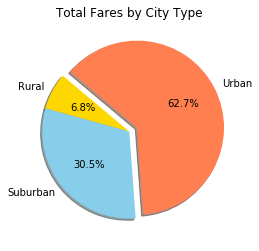

In [26]:
# Calculate Type Percents
group_type = city_ride.groupby(["type"])
sum_fare = group_type["fare"].sum()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(sum_fare, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow = True, 
       startangle=140)
plt.title("Total Fares by City Type")


# Save Figure
plt.savefig("TotalFaresCityPie.png")
plt.show()

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

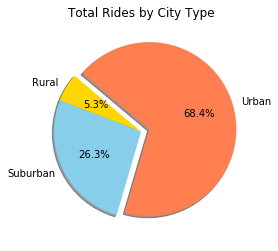

In [27]:
# Calculate Ride Percents
total_rides = group_type["ride_id"].nunique()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(total_rides, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow = True, 
       startangle=140)
plt.title("Total Rides by City Type")

# Save Figure
plt.savefig("TotalRidesCityPie.png")
plt.show()

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

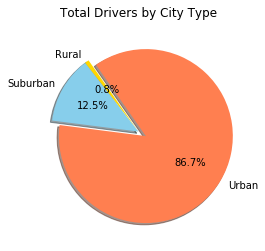

In [28]:
# Calculate Driver Percents
total_drivers = group_type["driver_count"].sum()
# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(total_drivers, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow = True, startangle=125)
plt.title("Total Drivers by City Type")
# Save Figure
plt.savefig("TotalDriversCity.png")
plt.show()


In [9]:
# Show Figure
plt.show()